<a href="https://colab.research.google.com/github/Legacy560/MTLSA25-Sales-Forecasting-Project/blob/main/Preprocessing/MLTSA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/.Kaggle

/content/gdrive/MyDrive/.Kaggle


In [4]:
ls kaggle.json

kaggle.json


In [5]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [3]:
cd /content/gdrive/Shareddrives/MLTSA_Project

/content/gdrive/Shareddrives/MLTSA_Project


In [4]:
!mkdir Project

mkdir: cannot create directory ‘Project’: File exists


In [5]:
cd Project

/content/gdrive/Shareddrives/MLTSA_Project/Project


In [6]:
!kaggle competitions download -c m5-forecasting-accuracy

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [10]:
!unzip m5-forecasting-accuracy.zip

Archive:  m5-forecasting-accuracy.zip
replace calendar.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df_calendar = pd.read_csv("calendar.csv")

In [8]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [9]:
df_sales_training = pd.read_csv("sales_train_validation.csv")

In [10]:
df_sales_training.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)

In [11]:
df_sales_training.shape

(30490, 1919)

In [12]:
df_sales_training.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [13]:
salesTrainingLong = df_sales_training.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
                         var_name="d", value_name="units_sold").dropna()

In [14]:
salesTrainingLong.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [15]:
salesTrainingLong.shape

(58327370, 8)

In [16]:
salesTrainingLong = salesTrainingLong[salesTrainingLong["units_sold"] != 0]

In [17]:
salesTrainingLong.shape

(18550276, 8)

In [18]:
df_sell_prices = pd.read_csv("sell_prices.csv")

In [19]:
df_sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [20]:
def downcast(df):
    for col, dtype in df.dtypes.items():
        if pd.api.types.is_categorical_dtype(dtype): # Check for categorical dtype first
            continue # Skip the column if it is categorical
        if np.issubdtype(dtype, np.integer):
            # Convert integers to the smallest possible type
            if df[col].min() >= np.iinfo(np.int8).min and df[col].max() <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif df[col].min() >= np.iinfo(np.int16).min and df[col].max() <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif df[col].min() >= np.iinfo(np.int32).min and df[col].max() <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)

        elif np.issubdtype(dtype, np.floating):
            # Convert floats to the smallest possible type
            if df[col].min() >= np.finfo(np.float16).min and df[col].max() <= np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif df[col].min() >= np.finfo(np.float32).min and df[col].max() <= np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

        elif np.issubdtype(dtype, np.object_):
            # Convert date column if applicable
            if 'date' in col.lower():
                df[col] = pd.to_datetime(df[col], errors='coerce')
            else:
                # Convert to category only if unique values are relatively low
                if df[col].nunique() / len(df) < 0.5:
                    df[col] = df[col].astype("category")

    return df

In [21]:
salesVal = downcast(salesTrainingLong)
prices = downcast(df_sell_prices)
cal = downcast(df_calendar)

<ipython-input-20-3cb3670a0212>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype): # Check for categorical dtype first
<ipython-input-20-3cb3670a0212>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype): # Check for categorical dtype first
<ipython-input-20-3cb3670a0212>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype): # Check for categorical dtype first
<ipython-input-20-3cb3670a0212>:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_ca

In [22]:
print("Before Downcasting:")
print(salesTrainingLong.dtypes)
print(f"Memory usage: {salesTrainingLong.memory_usage(deep=True).sum() / 1024:.2f} KB")


print("\nAfter Downcasting:")
print(salesVal.dtypes)
print(f"Memory usage: {salesVal.memory_usage(deep=True).sum() / 1024:.2f} KB")

Before Downcasting:
id            category
item_id       category
dept_id       category
cat_id        category
store_id      category
state_id      category
d             category
units_sold       int16
dtype: object
Memory usage: 366350.74 KB

After Downcasting:
id            category
item_id       category
dept_id       category
cat_id        category
store_id      category
state_id      category
d             category
units_sold       int16
dtype: object
Memory usage: 366350.74 KB


In [23]:
print("Before Downcasting:")
print(df_sell_prices.dtypes)
print(f"Memory usage: {df_sell_prices.memory_usage(deep=True).sum() / 1024:.2f} KB")


print("\nAfter Downcasting:")
print(prices.dtypes)
print(f"Memory usage: {prices.memory_usage(deep=True).sum() / 1024:.2f} KB")

Before Downcasting:
store_id      category
item_id       category
wm_yr_wk         int16
sell_price     float16
dtype: object
Memory usage: 47038.70 KB

After Downcasting:
store_id      category
item_id       category
wm_yr_wk         int16
sell_price     float16
dtype: object
Memory usage: 47038.70 KB


In [24]:
print("Before Downcasting:")
print(df_calendar.dtypes)
print(f"Memory usage: {df_calendar.memory_usage(deep=True).sum() / 1024:.2f} KB")


print("\nAfter Downcasting:")
print(cal.dtypes)
print(f"Memory usage: {cal.memory_usage(deep=True).sum() / 1024:.2f} KB")

Before Downcasting:
date            datetime64[ns]
wm_yr_wk                 int16
weekday               category
wday                      int8
month                     int8
year                     int16
d                       object
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                   int8
snap_TX                   int8
snap_WI                   int8
dtype: object
Memory usage: 167.36 KB

After Downcasting:
date            datetime64[ns]
wm_yr_wk                 int16
weekday               category
wday                      int8
month                     int8
year                     int16
d                       object
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                   int8
snap_TX                   int8
snap_WI                   int8
dtype: object
Memory usage: 167.36 KB


Checking Missing values

In [25]:
display(salesTrainingLong.isnull().sum())
display(df_calendar.isnull().sum())
display(df_sell_prices.isnull().sum())

,0
id,0
item_id,0
dept_id,0
cat_id,0
store_id,0
state_id,0
d,0
units_sold,0


,0
date,0
wm_yr_wk,0
weekday,0
wday,0
month,0
year,0
d,0
event_name_1,1807
event_type_1,1807
event_name_2,1964


,0
store_id,0
item_id,0
wm_yr_wk,0
sell_price,0


#Merging Dataset


In [26]:
salesTrainingLong=salesTrainingLong.merge(df_calendar, on="d", how="left")

In [27]:
salesTrainingLong

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_022_CA_1_validation,HOBBIES_1_022,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18550271,FOODS_3_819_WI_3_validation,FOODS_3_819,FOODS_3,FOODS,WI_3,WI,d_1913,2,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
18550272,FOODS_3_820_WI_3_validation,FOODS_3_820,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
18550273,FOODS_3_822_WI_3_validation,FOODS_3_822,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0
18550274,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1,2016-04-24,11613,...,2,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [28]:
salesFull = salesTrainingLong.merge(df_sell_prices, on=["store_id", "item_id", "wm_yr_wk"], how="left")

In [29]:
# salesFull

In [30]:
del salesVal

In [31]:
del prices

In [32]:
del cal

In [33]:
del salesTrainingLong

In [34]:
salesFull.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
1,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.559570
2,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.700195
3,HOBBIES_1_016_CA_1_validation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,d_1,5,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.700195
4,HOBBIES_1_022_CA_1_validation,HOBBIES_1_022,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,6.859375


In [35]:
salesFull.isnull().sum()

,0
id,0
item_id,0
dept_id,0
cat_id,0
store_id,0
state_id,0
d,0
units_sold,0
date,0
wm_yr_wk,0


In [36]:
salesFull['total_sale'] = salesFull['units_sold'] * salesFull['sell_price']

In [37]:
# salesFull.to_csv("/content/gdrive/MyDrive/MLTSA25/Project/salesFull.csv", index=False)

In [38]:
#salesFull.to_feather("/content/gdrive/MyDrive/MLTSA25/Project/salesFull.feather")

In [39]:
#salesFull.shape

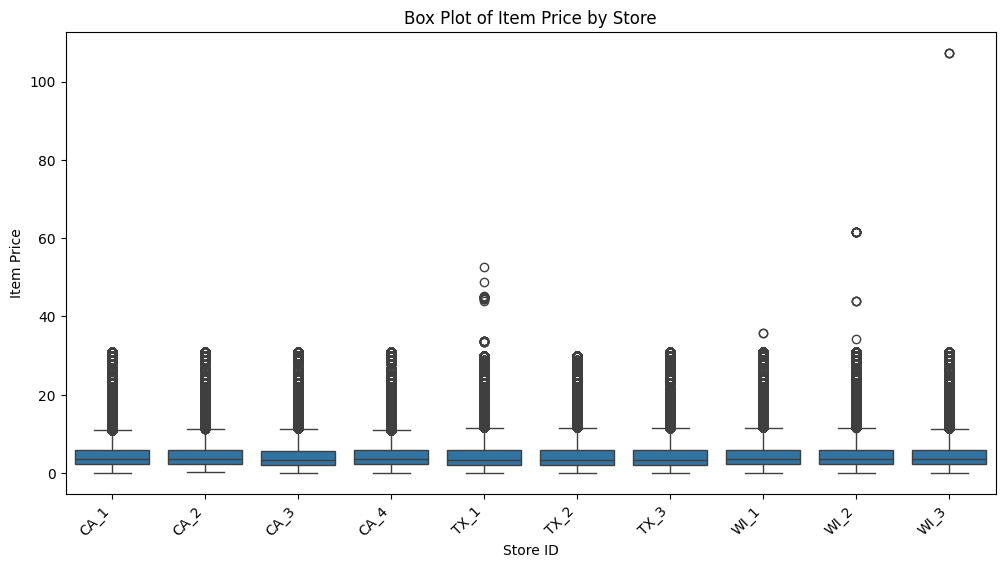

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sell_price', data=df_sell_prices)
plt.title('Box Plot of Item Price by Store')
plt.xlabel('Store ID')
plt.ylabel('Item Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

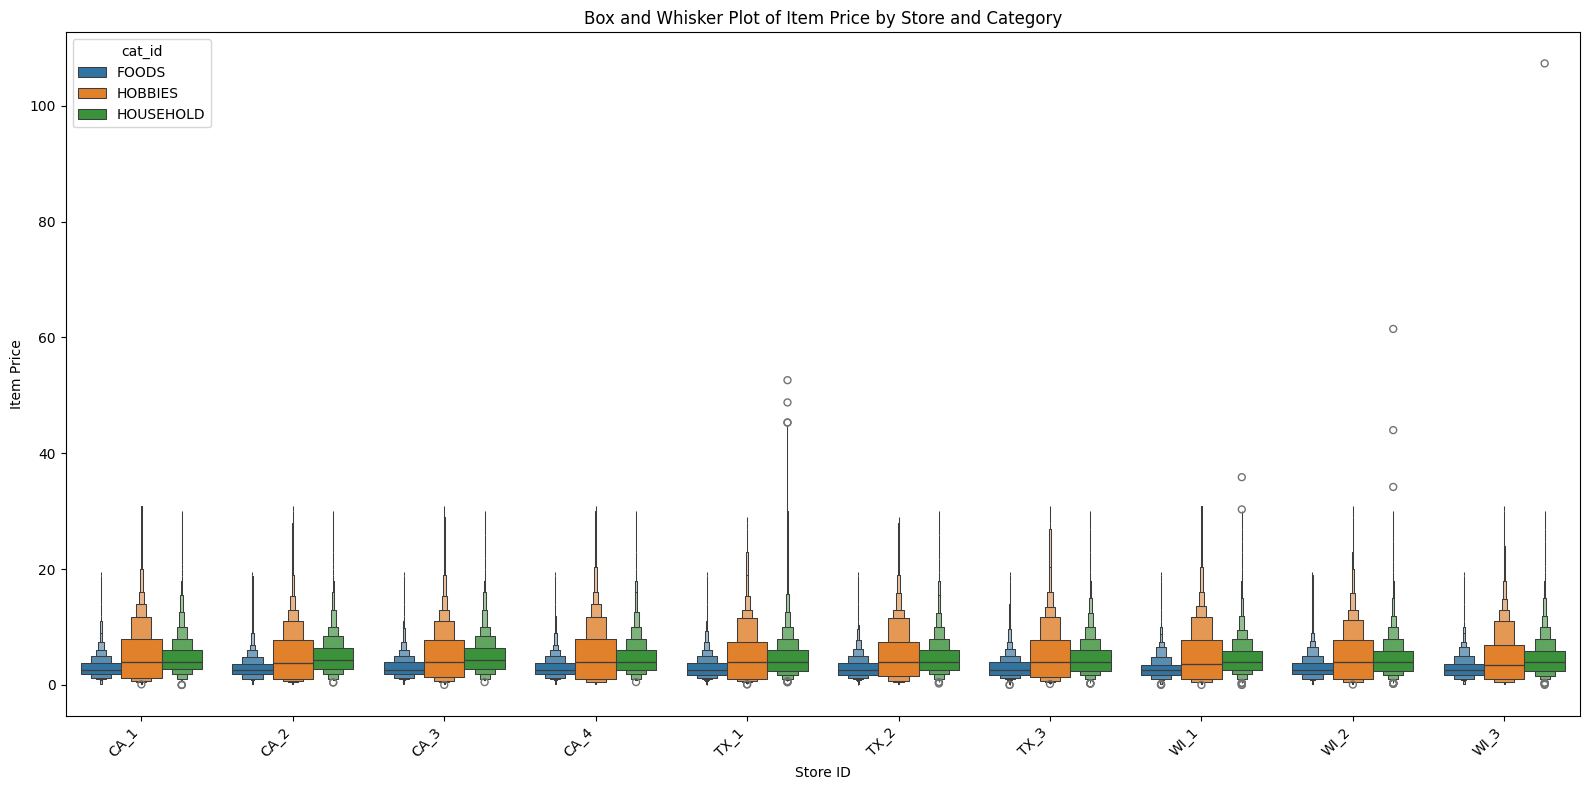

In [41]:
plt.figure(figsize=(16, 8))
sns.boxenplot(x='store_id', y='sell_price', hue='cat_id', data=salesFull) #Using boxenplot for better visualization with large datasets
plt.title('Box and Whisker Plot of Item Price by Store and Category')
plt.xlabel('Store ID')
plt.ylabel('Item Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()